In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1N7rk-kfnDFIGMeXOROVTjKh71gcgx-7R

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1N7rk-kfnDFIGMeXOROVTjKh71gcgx-7R

but Gdown can't. Please check connections and permissions.


In [ ]:
%%capture
import string
import nltk
nltk.download("stopwords")
nltk.download("punkt_tab")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### Naive Bayes

In [ ]:
path = '/content/drive/MyDrive/Data Science Projects/Machine Learning Projects/Email_classification/2cls_spam_text_cls.csv'
data = pd.read_csv(path)
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.value_counts(data['Category'])

,count
Category,
ham,4825
spam,747


<Axes: xlabel='Category', ylabel='count'>

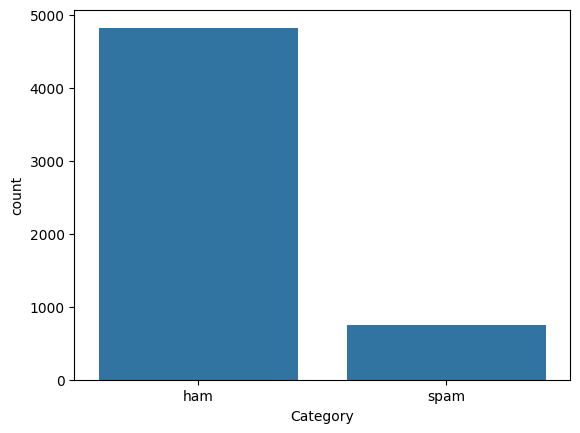

In [ ]:
sns.countplot(x=data['Category'])

In [ ]:
messages = data["Message"].values.tolist()
labels = data['Category'].values.tolist()

In [ ]:
def lowercase(text):
  return text.lower()

def punctuation_removal(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

def tokenize(text):
  return word_tokenize(text)

def remove_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  return [token for token in tokens if token not in stop_words]

def stemming(tokens):
  stemmer = nltk.stem.PorterStemmer()
  return [stemmer.stem(token) for token in tokens]

def preprocess_text(text):
  text = lowercase(text)
  text = punctuation_removal(text)
  text = tokenize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [ ]:
messages = [preprocess_text(message) for message in messages]

In [ ]:
def create_dictionary(messages):
  dictionary = {}
  for tokens in messages:
    for token in tokens:
      token.strip()
      if token in dictionary:
        dictionary[token] += 1
      else:
        dictionary[token] = 1
  return dictionary

dictionary = create_dictionary(messages)

In [ ]:
def create_features(tokens, dictionary):
  features = np.zeros(len(dictionary))
  for token in tokens:
    if token in dictionary:
      features[list(dictionary.keys()).index(token)] += 1
  return features

X = np.array([create_features(tokens, dictionary) for tokens in messages])

In [ ]:
label = LabelEncoder()
y = label.fit_transform(labels)

print(f"Classes: {label.classes_}")
print(f"Encoded labels: {y}")

Classes: ['ham' 'spam']
Encoded labels: [0 0 1 ... 0 0 0]


In [ ]:
VAL_SIZE = 0.2
TEST_SIZE = 0.2
SEED = 0

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=SEED)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TEST_SIZE, shuffle=True, random_state=SEED)


In [ ]:
model = GaussianNB()
print("Start training....")
model.fit(X_train, y_train)
print("Training completed!")

Start training....
Training completed!


In [ ]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Val accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Val accuracy: 0.884304932735426
Test accuracy: 0.8822869955156951
